# Введение

Для задания выбрана статья [A Framework for Linear TV Recommendation by Leveraging Implicit Feedback](https://link.springer.com/chapter/10.1007/978-981-13-2622-6_16), в которой представлен метод преобразования неявного фидбека пользователя (продолжительность просмотра передачи на ТВ и количество взаимодействий с ней) в явный с целью дальнейшего использования в рекомендательных системах. В статье рассматривается широковещательное телевидение, где нет возможности получить явный фидбек, и есть график передач с рекламой, что приводит к увеличению взаимодействий с передачей (смена канала на рекламу). Яндекс объединяет в своих сервисах и Linear TV, и TV on demand, поэтому подход в статье можно использовать для преобразования фидбека из Эфира как для рекомендаций как на нём же, так и для рекомендаций в Фильмах.

В статье эксперименты проводятся на открытом датасете, доступном по ссылке [TV audience dataset](http://recsys.deib.polimi.it/?page%20id=76). В задании произведена реализация метода из статьи с выводами.

# Разбор статьи

### _Описание метода_

В статье поставлена цель преобразовать неявный фидбек пользователя в явный для использования в рекомендательных системах. В неявном фидбеке доступны только продожительность просмотра передачи $P$ пользователем $U$ в данное взаимодействие и количество таких взаимодействиий, при этом имеют место следующие особенности:
* Наличие рекламы приводит к увеличению взаимодействий пользователя и передачи и меняет реальную продолжительность передачи. 
* Передача транслируется с повторами, но пользователь обычно смотрит её только один раз.

Это приводит к следующим допущениям и понятиям:
* Вводится $ART$ _(Actual Running Time)_, которое вычисляется как максимум из средней продолжительности передачи по всем пользователям.
* Вводится $TF$ _(Total Frequency)_, которое вычисляется как максимум из числа взаимодействий с передачей по всем пользователям.

Для перевода неявного фидбека в рейтинги авторы вводят следующие понятия:
* $DR$ (_Duration Ratio_) -- отношение средней продолжительности передачи к _ART_ этой передачи.
* $FR$ (_Frequency Ratio_) -- отношение числа взаимодействия пользователя с  передачей к _TF_ этой передачи.

Обе новые характеристики принимают значения от 0 до 1, и эти значения переводятся в рейтинг. Для $FR$ перевод в рейтинг равномерный:

| Bin no.|Frequency Ratio (FR) | Rating |
| :-----:|:-------------------:|:------:|
| 1      | > 0.0 & ≤ 0.2       |1       |
| 2      | > 0.2 & ≤ 0.4       |2       |
| 3      | > 0.4 & ≤ 0.6       |3       |
| 4      | > 0.6 & ≤ 0.8       |4       |
| 5      | > 0.8 & ≤ 1.0       |5       |


Для $DR$ перевод в рейтинг неравномерный, и авторы это объясняют основу для такого решения как _findings derived from the available dataset_:


| Bin no.|Duration Ratio (DR)  | Rating |
| :-----:|:-------------------:|:------:|
| 1      | > 0.0 & ≤ 0.05      |1       |
| 2      | > 0.05 & ≤ 0.25     |2       |
| 3      | > 0.25 & ≤ 0.50     |3       |
| 4      | > 0.50 & ≤ 0.75     |4       |
| 5      | > 0.75 & ≤ 1.0      |5       |

Полученные после перевода значения рейтинга обозначаются как $R_{frequency}$ и $R_{duration}$ соответственно, а итоговый рейтинг вычисляется с добавлением параметра $n$, где $0\leq n\leq 1$:

$$R_{final} = (R_{frequency})^{n}\cdot (R_{duration})^{1-n}$$

### _Эксперименты_

Для экспериментов использован датасет [TV audience dataset](http://recsys.deib.polimi.it/?page%20id=76), для которого авторы статьи используют своё разбиение данных на 5 частей для проведения 5-fold cross validation и усреднением результата. При этом все взаимодействия пользователя с передачей продолжительностью меньше 1 минуты отфильтровываются.

В статье представлены графики для рейтингов, на основе которых сделаны выводы о том, что большое количество минимального рейтинга = 1 говорит о том, что передачи пролистывали во время рекламы. И что эта привязанность к сетке вещания отличает взаимодействие от TV on demand. 

Для оценки качества используют метрики $RMSE$, $Precision$, $Recall$ и  $F1$, которые используют для сравнения результатов для различных $n$ из множества $\{0, 0.25, 0.5, 0.75, 1\}$ на алгоритмах рекомендательных систем: User-based Collaborative Filtration, Item-based Collaborative Filtration, Singular Value Decomposition, Non-negative Matrix Factorization, Probabilistic Matrix Factorization. Во всех экспериментах лучший результат у $n = 0.75$, то есть вклад в рейтинг от частоты больше.

### _Лирическое отступление_

Во время работы над литературным обзором в продолжение семестровой практики по [автоматической генерации плейлистов](https://compscicenter.ru/projects/413/) я наткнулась на работы [Bob L. Sturm](http://www.eecs.qmul.ac.uk/~sturm/), который серьёзно подошёл к вопросу качества проводимых в статьях экспериментов и сделал несколько обзоров, в том числе изучение около 500 статей по теме распознавания музыкального жанра [(link)](https://link.springer.com/chapter/10.1007/978-3-319-12093-5_2). Эти обзоры привели к выводам, которые актуальны в любой области анализа данных, не только распознавания музыкального жанра
[(link)](https://www.tandfonline.com/doi/abs/10.1080/09298215.2014.894533):
1. Define problems with use cases and formalism
2. Design valid and relevant experiments
3. Perform system analysis deeper than just evaluation
4. Acknowledge limitations and proceed with skepticism
5. Make reproducible work reproducible

В другой статье [An Analysis of the GTZAN Music Genre Dataset](https://dl.acm.org/citation.cfm?id=2390851) тот же автор изучил датасет GTZAN, который используется в большинстве работ по распознаванию музыкального жанра и показал наличие в данных такого количества ошибок, что это ставит под сомнение результаты работ и их сравнение. Это приводит к главному выводу:

<ol start="0">
  <li>__Know your data__</li>
</ol>

Пользуясь этими выводами, сформулирую сомнительные моменты по статье. Кстати, в этой же области Music Information Retrieval есть статья с философским названием [How Significant is Statistically Significant?](https://julian-urbano.info/publications/041-how-significant-statistically-significant-case-audio-music-similarity-retrieval.html).

### _Скептические размышления по статье_

* Не указан способ разбиения датасета, что делает невозможным воспроизведение экспериментов. 
* Непонятно, по каким инсайтам из данных один из рейтингов берётся неравномерно -- нет примеров или пояснений.
* В датасете данные собраны для 19 недель, составители при этом пишут, что недели с 14-й по 19-ю лучше не использовать из-за наличия ошибок. Авторы статьи взяли 12 недель (без указания, каких).
* В данных есть столбец slot, который отвечает за время трансляции передачи, и один и тот же event_ID может иметь различные slot, т.к. передача может транслироваться несколько раз. Авторы статьи не упомянули о том, было ли это учтено при использовании данных. 
* Для параметра $n$ используется набор  $\{0, 0.25, 0.5, 0.75, 1\}$, когда его можно подобрать алгоритмами машинного обучения или из оценки $AUC$ -- тем более, что в качестве метрик используются $Precision$ и $Recall$.
* Используются метрики, оперирующие понятием релевантности, которое в контексте статьи не введено -- имеется ли в виду, что пользователю на тестовом множестве предсказали передачу, которую он в ней смотрел или что-то другое?
* По итогам эксперимента отдаётся предпочтение $n = 0.75$, то есть больший вклад у рейтинга для частот -- тот самый, который переводится неравномерным образом. При этом не проведено связи этого значения с графиками для разных $n$.
* Постановку эксперимента авторы описывают как сравнение того, улучшились ли результаты для алгоритмов по указанным метрикам, но под сравнением имеется в виду только разные $n$ из их метода, baseline нет.
* Не написаны подробности реализации алгоритмов: какие библиотеки и ресурсы, какие параметры для алгоритмов. Ссылок на код нет.
* Взаимодействия меньше одной минуты отфильтровываются. Эта информация может быть ценной. Например, указывать на то, что передача не понравилась -- нужно было посмотреть на такие данные. Кроме того, фильтрация по абсолютному значению в одну минуту вызывает подозрения, ведь продолжительность передач может разниться в несколько раз.
* Графики выглядят информативными, но информативность мало раскрыта в статье, только делается вывод о том, что передачи часто пролистывают, и что это отличает Linear TV от TV on demand (без ссылок на данные по TVOD).

Воспроизвести результат не получится: нет разбиения, подробностей реализации, а также понятия релевантности, которое используется для метрик. Поэтому в эксперименте реализован только сам метод с построением графиков рейтингов, а от датасета используется 1 неделя для ускорения вычислений.

# Реализация метода

In [1]:
import pandas as pd

Посмотрим на данные, чтобы определиться с параметрами метода read_csv:

In [2]:
%%bash 
head tv-audience-dataset.csv

46,19,1,5,81,1,202344,50880093,5
46,20,1,5,81,1,202344,50880093,15
46,20,1,3,28,1,254329,50880094,41
1,19,1,6,11,2,109428,51094492,11
1,19,1,6,86,2,6017,51094494,5
1,19,1,5,98,2,6187,51094496,12
4,19,1,5,13,2,142037,51092594,1
46,19,1,5,81,2,202344,50880093,1
46,19,1,5,81,2,202344,50880093,5
46,20,1,5,81,2,202344,50880093,15


Заголовка нет, разделитель дефолтный. Названия колонок из описания:

In [3]:
col_names = ['channel_ID', 'slot', 'week', 'genre_ID', 'subGenre_ID', 'user_ID', 'program_ID', 'event_ID', 'duration']

Размер файла:

In [4]:
%%bash
ls -l --b=M tv-audience-dataset.csv

-rw-r--r-- 1 n n 1095M дек 20  2014 tv-audience-dataset.csv


Больше гигабайта. Ограничимся первой неделей, за неделю отвечает третий столбец:

In [5]:
%%bash
awk -F',' '$3 == /1/ {print }' tv-audience-dataset.csv > tv-1week.csv

Размер полученного файла:

In [6]:
%%bash
ls -l --b=M tv-1week.csv

-rw-r--r-- 1 n n 59M ноя  5 21:42 tv-1week.csv


Гораздо лучше. В статье используются только последние 4 столбца:

In [9]:
col_used = col_names[5:]

In [10]:
tv_dataset = pd.read_csv('tv-1week.csv', header=None, names=col_names, usecols=col_used)

In [11]:
tv_dataset.head()

,user_ID,program_ID,event_ID,duration
0,1,202344,50880093,5
1,1,202344,50880093,15
2,1,254329,50880094,41
3,2,109428,51094492,11
4,2,6017,51094494,5


In [12]:
tv_dataset.shape

(1808916, 4)

Для вычисления $ART$ и $TF$ нужно посчитать среднюю продолжительность передачи для каждого пользователя и общее число взаимодействиий (ивентов) пользователя и передачи. После этого $ART$ и $TF$ получаются как максимум по пользователям в каждой передаче. Средняя продолжительность и общее число взаимодействий:

In [13]:
tv_grouped = tv_dataset.groupby(['program_ID', 'user_ID']).agg({'event_ID': 'count', 'duration': 'mean'}).reset_index()
tv_grouped = tv_grouped.rename(columns={'event_ID': 'event_cnt', 'duration': 'duration_avg'})

In [14]:
tv_grouped.head()

,program_ID,user_ID,duration_avg,event_cnt
0,1,2,5.428571,7
1,1,3,2.578947,95
2,1,4,2.847458,59
3,1,5,2.000000,19
4,1,6,2.370370,27


Теперь посчитаем $ART$ и $TF$ через вспомогательную таблицу

In [15]:
tv_max = tv_grouped.groupby('program_ID').agg({'duration_avg': 'max', 'event_cnt': 'max'}).reset_index()
tv_max = tv_max.rename(columns={'duration_avg': 'ART', 'event_cnt': 'TF'})
tv_max.head()

,program_ID,TF,ART
0,1,514,60.0
1,3986,4,37.5
2,4095,2,15.0
3,4146,7,49.5
4,4147,6,52.0


Осталось объединить таблицы:

In [16]:
tv_merged = tv_grouped.merge(tv_max, how = 'left', left_on='program_ID', right_on='program_ID')

In [17]:
tv_merged.head()

,program_ID,user_ID,duration_avg,event_cnt,TF,ART
0,1,2,5.428571,7,514,60.0
1,1,3,2.578947,95,514,60.0
2,1,4,2.847458,59,514,60.0
3,1,5,2.000000,19,514,60.0
4,1,6,2.370370,27,514,60.0


Теперь посчитаем $DR$ и $FR$:

In [18]:
tv_merged['DR'] = tv_merged.duration_avg / tv_merged.ART
tv_merged['FR'] = tv_merged.event_cnt / tv_merged.TF

In [19]:
tv_merged.head(10)

,program_ID,user_ID,duration_avg,event_cnt,TF,ART,DR,FR
0,1,2,5.428571,7,514,60.0,0.090476,0.013619
1,1,3,2.578947,95,514,60.0,0.042982,0.184825
2,1,4,2.847458,59,514,60.0,0.047458,0.114786
3,1,5,2.000000,19,514,60.0,0.033333,0.036965
4,1,6,2.370370,27,514,60.0,0.039506,0.052529
5,1,7,6.625000,24,514,60.0,0.110417,0.046693
6,1,8,6.625000,24,514,60.0,0.110417,0.046693
7,1,9,9.000000,16,514,60.0,0.150000,0.031128
8,1,10,4.000000,5,514,60.0,0.066667,0.009728
9,1,11,3.959184,49,514,60.0,0.065986,0.095331


Последний шаг -- перевести $DR$ и $FR$ в рейтинги:

In [20]:
def rating_DR(x):
    if 0 < x <= 0.05:
        return 1
    if 0.05 < x <= 0.25:
        return 2
    if 0.25 < x <= 0.5:
        return 3
    if 0.5 < x <= 0.75:
        return 4
    if 0.75 < x <= 1:
        return 5
    
from math import ceil

def rating_FR(x):
    return ceil(x * 5)

In [21]:
tv_merged['rating_duration'] = [rating_DR(x) for x in tv_merged.DR]
tv_merged['rating_frequency'] = [rating_FR(x) for x in tv_merged.FR]

In [22]:
tv_merged.head(10)

,program_ID,user_ID,duration_avg,event_cnt,TF,ART,DR,FR,rating_duration,rating_frequency
0,1,2,5.428571,7,514,60.0,0.090476,0.013619,2,1
1,1,3,2.578947,95,514,60.0,0.042982,0.184825,1,1
2,1,4,2.847458,59,514,60.0,0.047458,0.114786,1,1
3,1,5,2.000000,19,514,60.0,0.033333,0.036965,1,1
4,1,6,2.370370,27,514,60.0,0.039506,0.052529,1,1
5,1,7,6.625000,24,514,60.0,0.110417,0.046693,2,1
6,1,8,6.625000,24,514,60.0,0.110417,0.046693,2,1
7,1,9,9.000000,16,514,60.0,0.150000,0.031128,2,1
8,1,10,4.000000,5,514,60.0,0.066667,0.009728,2,1
9,1,11,3.959184,49,514,60.0,0.065986,0.095331,2,1


Посмотрим на графики и сравним их с соответствующими в статье:

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline  

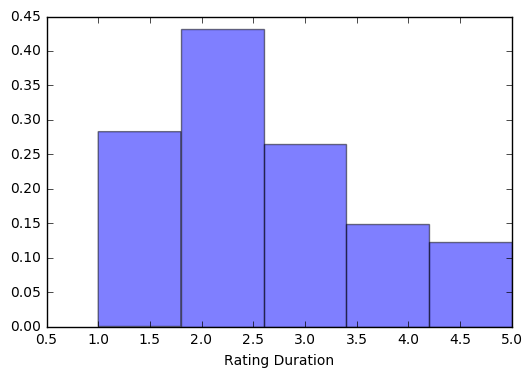

In [24]:
plt.hist(tv_merged.rating_duration, bins=5, facecolor='blue', normed=1, alpha=0.5)
plt.xlabel('Rating Duration')
plt.show()

Примечательно, что этот график выглядит очень похоже по распределению на тот, который представлен в статье по большему количеству данных и с фильтрацией по продолжительности менее минуты. То есть данные разные по количеству и преодобработке, а распределение похоже. Ради интереса посмотрим на то, как выглядит рейтинг продолжительности, если его переводить равномерно:

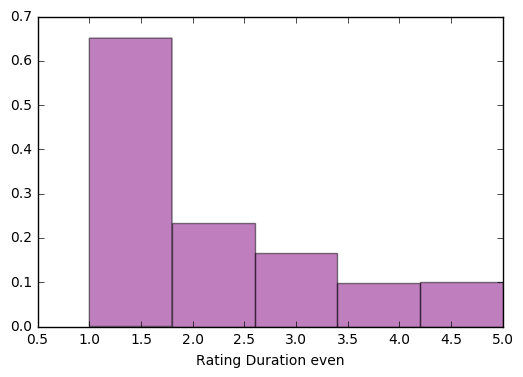

In [25]:
RD_even = [rating_FR(x) for x in tv_merged.DR]
plt.hist(RD_even, bins=5, facecolor='purple', normed=1, alpha=0.5)
plt.xlabel('Rating Duration even')
plt.show()

И это получилось более похоже на рейтинг по частоте:

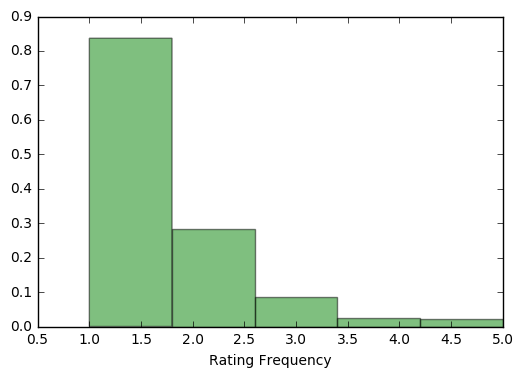

In [26]:
plt.hist(tv_merged.rating_frequency, bins=5, facecolor='green', normed=1, alpha=0.5)
plt.xlabel('Rating Frequency')
plt.show()

Заметим, что в статье для рейтинга по частоте есть заметный скачок для рейтинга, равного 5 -- примерно 25% пользователей смотрят передачу на постоянной основе. Здесь эта цифра гораздо меньше.
И оба графика при равномерном переводе в рейтинг выглядят похоже на экспоненту (в целом присущей User-Item interaction), что ставит под вопрос, несёт ли этот рейтинг какую-либо полезную информацию.

Посмотрим на итоговый рейтинг для разных $n$, как указано в статье.

In [27]:
def rating_final(x, y, n=0):
    return x ** n * y ** (1 - n)


In [28]:
ratings = tv_merged.loc[:,['rating_frequency','rating_duration']]

In [29]:
ratings.head()

,rating_frequency,rating_duration
0,1,2
1,1,1
2,1,1
3,1,1
4,1,1


In [30]:
for i in range(5):
    n = i/4
    col_name = 'n={}'.format(n)
    ratings[col_name] = [rating_final(x, y, n) for x, y in zip(ratings.rating_frequency, ratings.rating_duration)]


In [31]:
ratings.head(10)

,rating_frequency,rating_duration,n=0.0,n=0.25,n=0.5,n=0.75,n=1.0
0,1,2,2.0,1.681793,1.414214,1.189207,1.0
1,1,1,1.0,1.000000,1.000000,1.000000,1.0
2,1,1,1.0,1.000000,1.000000,1.000000,1.0
3,1,1,1.0,1.000000,1.000000,1.000000,1.0
4,1,1,1.0,1.000000,1.000000,1.000000,1.0
5,1,2,2.0,1.681793,1.414214,1.189207,1.0
6,1,2,2.0,1.681793,1.414214,1.189207,1.0
7,1,2,2.0,1.681793,1.414214,1.189207,1.0
8,1,2,2.0,1.681793,1.414214,1.189207,1.0
9,1,2,2.0,1.681793,1.414214,1.189207,1.0


Графики для финального рейтинга при различных $n$:

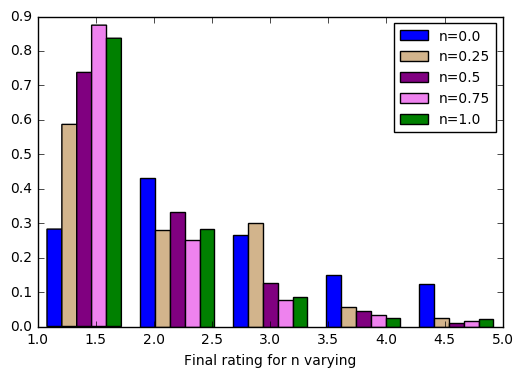

In [32]:
colors = ['blue', 'tan', 'purple','violet', 'green',]
labels = ['n=0.0', 'n=0.25', 'n=0.5', 'n=0.75', 'n=1.0']
ratings_to_plot = [ratings['n=0.0'], ratings['n=0.25'], ratings['n=0.5'], ratings['n=0.75'], ratings['n=1.0']]
plt.hist(ratings_to_plot, bins=5, histtype='bar', normed=1, color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.xlabel('Final rating for n varying')
plt.show()

Бросается в глаза, что для $n=0.5$, $n = 0.75$, $n = 1.0$ заметной разницы нет, в то время как $n = 1$ это рейтинг частоты в чистом виде (которая переводится в рейтинг равномерно). Графики отличаются от представленных в статье, где для рейтингов 3, 4 и 5 n = 0.75 показывает лучший результат.

# Дальнейшее развитие

Идея преобразовывать неявный фидбек в явный рейтинг выглядит перспективной, с добавлением анализа данных и других алгоритмов может привести к чему-то интересному. Датасет заслуживает отдельного внимания и более подробного анализа и может сделать рейтинги более информативными. Соображения по дальнейшему анализу датасета:
* Изучить продолжительность взаимодействий с передачей: например, маленькое время взаимодействия без наличия продолжительного можно использовать как негативный отзыв.
* Посмотреть на зависимость признаков между собой. 
* Добавить slot в рассмотрение продолжительности просмотра и числа взаимодействий.
* Помимо рассмотренных в статье столбцов датасет содержит жанры и поджанры, как и время просмотра (неделя и час на этой недели, от 1 до 24*7=168). И это прекрасно. Можно смотреть на популярность жанров в разное время и рекомендовать пользователю передачу в зависимости от настоящего времени.
* Изучить похожесть жанров на основе истории просмотра.
* Из любопытства можно убрать жанры и кластеризовать поджанры на основе других признаков и посмотреть, насколько это будет совпадать с истинными метками. Как показало изучение темы музыкальных жанров, границы размыты и чёткой таксономии нет.
* Рекомендовать пользователю передачу по жанру исходя из его истории просмотра и истории просмотра "похожих" на него пользователей.